In [121]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv2
from mpl_toolkits.mplot3d import Axes3D



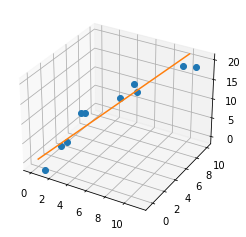

In [126]:
n = 10

x = np.linspace(10,0,n)

y = np.linspace(10,0,n)

def noiseVector(n):
    """
    Generates a vector of noise values
    """
    return np.random.randn(n) 

noisex = noiseVector(n)
noisey = noiseVector(n)
noisez = noiseVector(n)

model_z = (2*x + 0.1*y)
measurement_z = (2*x + 0.1*y + noisez)
model = np.array([x,y,model_z])
measurement = np.array([x+noisex,y+noisey,measurement_z])

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(measurement[0],measurement[1],measurement[2],'o',label='measurement')
ax.plot(model[0],model[1],model[2],'-',label='model')

v = -(model.T[0] - model.T[1])


# fig = plt.figure()

# ax = fig.add_subplot(111, projection='3d')
# ax.plot(v[0],v[1],v[2],'o',label='v',color='red')
# ax.plot(0,0,0,'o',label='origin',color='black')


In [123]:

def kalmanPosition(measurement, x_prediction, P_prediction, Q, R,k):
    """
    Kalman filter for position
    input:
        measurement: measured x,y,z
        x_prediction: x,y,z prediction from previous iteration
        P_prediction: covariance matrix from previous iteration
        Q: process noise covariance matrix
        R: measurement noise covariance matrix
        k: iteration number
    output:
        x_prediction: x,y,z prediction from current iteration
        P_prediction: covariance matrix from current iteration
    """
    # A = np.array([[v[0]*k,0,0],[0,v[1]*k,0],[0,0,v[2]*k]])
    A = np.eye(3)
    B = v * k
    
    # Prediction
    x_prediction = A @ x_prediction + B
    P_prediction = A @ P_prediction @ A.T + Q

    k+=1

    # Update
    H = np.eye(3)
    K = P_prediction @ H.T @ np.linalg.inv(H @ P_prediction @ H.T + R)
    x_prediction = x_prediction + K @ (measurement - H @ x_prediction)
    P_prediction = (np.eye(3) - K @ H) @ P_prediction


    return x_prediction, P_prediction



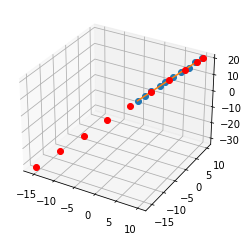

In [124]:
k=1
r_xy = 10
r_z = 10
x_init = model.T[0]

P_init = np.eye(3)
Q_init = np.eye(3)
R_init = np.array([[r_xy,0,0],[0,r_xy,0],[0,0,r_z]])

kalman_estimates = np.zeros_like(measurement).T
kalman_estimates[0] = x_init

for i in range(n-1):
    x_prediction, P_prediction = kalmanPosition(measurement.T[i],x_init,P_init,Q_init,R_init,k)
    kalman_estimates[i+1] = x_prediction
    x_init = x_prediction
    P_init = P_prediction
    k+=1

kalman_estimates = kalman_estimates.T

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(measurement[0],measurement[1],measurement[2],'o',label='measurement')
ax.plot(model[0],model[1],model[2],'-',label='model')
ax.plot(kalman_estimates[0],kalman_estimates[1],kalman_estimates[2],'o',label='kalman_estimates',color='red')

In [125]:
for i in range(n):
    print(kalman_estimates.T[i],model.T[i])



[10. 10. 21.] [10. 10. 21.]
[ 9.05138415  9.06527258 19.05603167] [ 8.88888889  8.88888889 18.66666667]
[ 7.25782192  7.29242604 15.28278041] [ 7.77777778  7.77777778 16.33333333]
[ 4.90767755  4.87246381 10.12549617] [ 6.66666667  6.66666667 14.        ]
[2.02600783 2.00904309 4.15955815] [ 5.55555556  5.55555556 11.66666667]
[-1.18124876 -1.25446509 -2.44338838] [4.44444444 4.44444444 9.33333333]
[-4.65933334 -4.65508804 -9.62263591] [3.33333333 3.33333333 7.        ]
[ -8.16144055  -8.21807862 -17.04839618] [2.22222222 2.22222222 4.66666667]
[-11.95532347 -11.9223287  -24.87240768] [1.11111111 1.11111111 2.33333333]
[-15.75724671 -15.70434602 -32.84924269] [0. 0. 0.]
